## 153 - Plotting Skew-T Heights as Text

[Youtube](https://www.youtube.com/watch?v=yrgVrUEm7x4)

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units, pandas_dataframe_to_unit_arrays

from siphon.simplewebservice.wyoming import WyomingUpperAir

In [2]:
date = datetime(2020, 10, 10)
station = 'OUN'

In [3]:
df = WyomingUpperAir.request_data(date, station)
df.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,970.0,345,27.6,17.6,160.0,8.0,-2.736161,7.517541,OUN,72357,2020-10-10,35.18,-97.44,345.0,24.52
1,969.0,354,27.0,17.0,160.0,8.0,-2.736161,7.517541,OUN,72357,2020-10-10,35.18,-97.44,345.0,24.52
2,941.2,610,24.8,16.0,170.0,13.0,-2.257426,12.802501,OUN,72357,2020-10-10,35.18,-97.44,345.0,24.52
3,925.0,763,23.4,15.4,165.0,14.0,-3.623467,13.522962,OUN,72357,2020-10-10,35.18,-97.44,345.0,24.52
4,909.0,914,22.0,14.9,160.0,15.0,-5.130302,14.095389,OUN,72357,2020-10-10,35.18,-97.44,345.0,24.52


In [4]:
d = pandas_dataframe_to_unit_arrays(df)

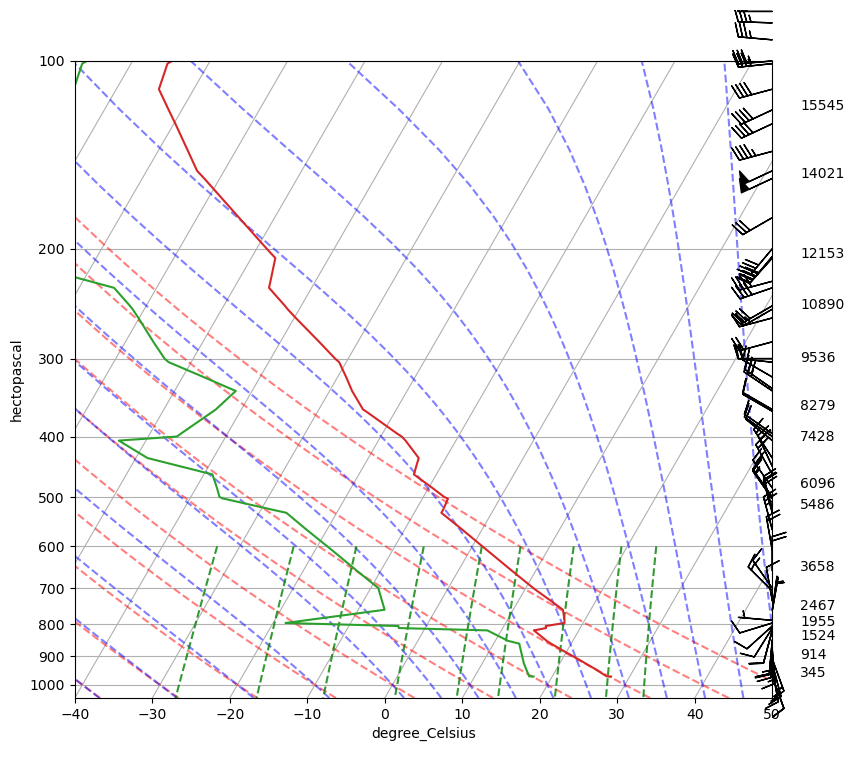

In [5]:
fig = plt.figure(figsize = (9, 9))
skew = SkewT(fig)

skew.plot(d['pressure'], d['temperature'], 'tab:red')
skew.plot(d['pressure'], d['dewpoint'], 'tab:green')
skew.plot_barbs(d['pressure'], d['u_wind'], d['v_wind'])

skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

decimate = 4
for p, t, h in zip(d['pressure'][::decimate], d['temperature'][::decimate], d['height'][::decimate]):
	if p >= 100 * units.hPa:
		skew.ax.text(1.04, p, round(h.m, 0), transform = skew.ax.get_yaxis_transform(which = 'tick2'))